<a href="https://colab.research.google.com/github/SatyaSirishaBolloju/Multiple_Linear_Regression/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction






In this project, I am utilizing Multiple Linear Regression, a widely used machine learning technique, to conduct predictive analysis. Multiple Linear Regression establishes a statistical relationship between a target variable (dependent variable) and a given set of predictor variables (independent variables). I am utilizing a dataset, sourced from Kaggle,  that contains anonymized corn-farming households in Taita Taveta, a county located in the Republic of Kenya, East Africa which offers valuable insights for sustainable agriculture in the region.

# Exploratory Data Analysis and Corn Yield Estimation using Scikit-learn

## Overview
This notebook is structured in the following manner, using the provided dataset:
1.	Importing relevant libraries and loading raw data in Python.
2.	Analyzing the spatial distribution of data points using Python.
3.	Conducting exploratory data analysis, preprocessing, and descriptive statistics.
4.	Handling missing values, dropping unnecessary columns, and addressing categorical variables.
5.	Examining probability distribution functions (PDFs) and determining correlations between variables.
6.	Performing grouping, aggregation, pivot tables, and cross-tabulation using Python.
7.	A brief discussion on sampling bias and conducting Data Quality Assessment (DQA).
8.	Assessing OLS assumptions, investigating multicollinearity, and estimating corn yield.
9.	Incorporating dummy variables and constructing the Linear Regression Model.
10.	Evaluating statistical significance (P-values) in Python.
11.	Interpreting the features and weights derived from the model.
12.	Concluding the analysis.


## Importing the relevant libraries

In [ ]:
# For this project we will need the following libraries and modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [ ]:
corn_data = pd.read_csv('corn_data.csv')

In [ ]:
#the top 5 rows of our data frame:
corn_data.head()

,County,Farmer,Education,Gender,Age bracket,Household size,Crop,Acreage,Fertilizer amount,Laborers,...,Water source,Main credit source,Crop insurance,Farm records,Main advisory source,Extension provider,Advisory format,Advisory language,Latitude,Longitude
0,TAITA TAVETA,fmr_65,Certificate,Male,36-45,7,corn,2.00,50,2,...,Rain,Credit groups,No,Yes,Radio,Private Provider,Phone Calls,Vernacular,-3.46,38.35
1,TAITA TAVETA,fmr_77,Certificate,Male,36-45,7,corn,0.25,50,2,...,Rain,Credit groups,No,Yes,Radio,County Government,SMS text,Kiswahili,-3.31,38.40
2,TAITA TAVETA,fmr_89,Certificate,Male,36-45,7,corn,3.00,251,2,...,Rain,Credit groups,No,Yes,Radio,Private Provider,Phone Calls,Vernacular,-3.41,38.37
3,TAITA TAVETA,fmr_102,Certificate,Male,36-45,7,corn,1.50,300,3,...,Rain,Credit groups,No,Yes,Radio,County Government,SMS text,Kiswahili,-3.39,38.37
4,TAITA TAVETA,fmr_25,Certificate,Male,46-55,3,corn,NaN,50,2,...,Rain,Credit groups,No,Yes,Radio,Private Provider,Phone Calls,Vernacular,-3.39,38.33


In [ ]:
#the last 5 rows of our data frame:
corn_data.tail()
#the tail of our data frame has some null values

,County,Farmer,Education,Gender,Age bracket,Household size,Crop,Acreage,Fertilizer amount,Laborers,...,Water source,Main credit source,Crop insurance,Farm records,Main advisory source,Extension provider,Advisory format,Advisory language,Latitude,Longitude
417,TAITA TAVETA,fmr_176,NaN,Male,46-55,6,corn,0.50,50,3,...,Rain,Credit groups,No,No,Extension services,County Government,Phone Calls,Kiswahili,-3.47,38.59
418,TAITA TAVETA,fmr_349,NaN,Female,46-55,7,corn,1.00,25,3,...,Rain,Savings,No,No,Public gatherings,Private Provider,Phone Calls,Kiswahili,-3.48,38.59
419,TAITA TAVETA,fmr_97,NaN,Female,46-55,6,corn,NaN,50,2,...,Rain,Credit groups,No,No,Radio,County Government,Phone Calls,Kiswahili,-3.41,38.35
420,TAITA TAVETA,fmr_188,NaN,Male,46-55,6,corn,0.75,25,3,...,Rain,Credit groups,No,No,Radio,County Government,Phone Calls,Kiswahili,-3.56,38.60
421,TAITA TAVETA,fmr_200,NaN,Male,46-55,6,corn,0.25,50,3,...,Rain,Credit groups,No,No,Radio,Private Provider,Phone Calls,Kiswahili,-3.41,38.37


### Spatial Distribution
we have latlong in our dataset, we can use plotly to visualize the geolocation of our farmers.

In [ ]:
pip install plotly

In [ ]:
# Now that we have installed plotly, lets import it
import plotly.express as px
fig = px.scatter_geo(corn_data,lon='Longitude',lat='Latitude', hover_name="Farmer")
fig.update_layout(title = 'Distribution of Corn Farmers in Taita Taveta County, Kenya', title_x=1)
fig.show()

Because the point data is formatted to 2 decimal places, the geopoints appear as one point. However, if you hover your mouse over the point, you see the different points, each representing a farmer who took the household survey.



## Exploratoty Data Analysis (EDA) and Preprocessing

In [ ]:
# Exploring data is the first step towards analysis. The see details of the farmer with
# the largest crop acreage:

pd.set_option('display.float_format', lambda x: '%.3f' % x)
corn_data['Acreage'].sort_values(ascending = False)
# This returns acreage in 3 decimal places since we have farmers with 0.125 acres.
# We can also see that some farmers do not have a value under acreage (nulls)

270   4.000
2     3.000
387   3.000
45    3.000
273   3.000
       ... 
391     NaN
392     NaN
399     NaN
409     NaN
419     NaN
Name: Acreage, Length: 422, dtype: float64

In [ ]:
# To locate the specific farmer, we use their index to see their complete profile:
corn_data.loc[270]

County                       TAITA TAVETA
Farmer                             fmr_67
Education                       Secondary
Gender                               Male
Age bracket                         46-55
Household size                          1
Crop                                 corn
Acreage                             4.000
Fertilizer amount                     300
Laborers                                8
Yield                                 600
Power source                       Manual
Water source                         Rain
Main credit source                Savings
Crop insurance                         No
Farm records                           No
Main advisory source                Radio
Extension provider      County Government
Advisory format                  SMS text
Advisory language               Kiswahili
Latitude                           -3.620
Longitude                          38.310
Name: 270, dtype: object

In [ ]:
#creating a tabular view.
corn_data[corn_data['Acreage'] == 4.000]

,County,Farmer,Education,Gender,Age bracket,Household size,Crop,Acreage,Fertilizer amount,Laborers,...,Water source,Main credit source,Crop insurance,Farm records,Main advisory source,Extension provider,Advisory format,Advisory language,Latitude,Longitude
270,TAITA TAVETA,fmr_67,Secondary,Male,46-55,1,corn,4.000,300,8,...,Rain,Savings,No,No,Radio,County Government,SMS text,Kiswahili,-3.620,38.310


### Exploring the descriptive statistics of the variables

In [ ]:
corn_data.describe()

,Household size,Acreage,Fertilizer amount,Laborers,Yield,Latitude,Longitude
count,422.000,351.000,422.000,422.000,422.000,422.000,422.000
mean,4.263,0.828,65.190,2.844,232.604,-3.418,38.404
std,1.706,0.585,65.755,0.974,135.377,0.079,0.094
min,1.000,0.250,20.000,2.000,50.000,-3.640,38.270
25%,3.000,0.500,25.000,2.000,100.000,-3.490,38.340
50%,4.000,0.500,50.000,3.000,180.000,-3.410,38.370
75%,5.000,1.000,75.000,3.000,330.000,-3.360,38.400
max,9.000,4.000,500.000,8.000,600.000,-3.250,38.630


In [ ]:
corn_data.describe(include='all')
# Note that categorical variables don't have some types of numerical descriptives
# and numerical variables don't have some types of categorical descriptives

,County,Farmer,Education,Gender,Age bracket,Household size,Crop,Acreage,Fertilizer amount,Laborers,...,Water source,Main credit source,Crop insurance,Farm records,Main advisory source,Extension provider,Advisory format,Advisory language,Latitude,Longitude
count,422,422,396,422,422,422.000,422,351.000,422.000,422.000,...,422,422,422,422,422,422,422,422,422.000,422.000
unique,1,422,5,2,5,NaN,1,NaN,NaN,NaN,...,1,3,1,2,5,4,2,3,NaN,NaN
top,TAITA TAVETA,fmr_65,Primary,Female,36-45,NaN,corn,NaN,NaN,NaN,...,Rain,Credit groups,No,No,Radio,County Government,Phone Calls,Kiswahili,NaN,NaN
freq,422,1,238,299,132,NaN,422,NaN,NaN,NaN,...,422,321,422,303,188,245,286,321,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,4.263,NaN,0.828,65.190,2.844,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.418,38.404
std,NaN,NaN,NaN,NaN,NaN,1.706,NaN,0.585,65.755,0.974,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.079,0.094
min,NaN,NaN,NaN,NaN,NaN,1.000,NaN,0.250,20.000,2.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.640,38.270
25%,NaN,NaN,NaN,NaN,NaN,3.000,NaN,0.500,25.000,2.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.490,38.340
50%,NaN,NaN,NaN,NaN,NaN,4.000,NaN,0.500,50.000,3.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.410,38.370
75%,NaN,NaN,NaN,NaN,NaN,5.000,NaN,1.000,75.000,3.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.360,38.400


In [ ]:
corn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   County                422 non-null    object 
 1   Farmer                422 non-null    object 
 2   Education             396 non-null    object 
 3   Gender                422 non-null    object 
 4   Age bracket           422 non-null    object 
 5   Household size        422 non-null    int64  
 6   Crop                  422 non-null    object 
 7   Acreage               351 non-null    float64
 8   Fertilizer amount     422 non-null    int64  
 9   Laborers              422 non-null    int64  
 10  Yield                 422 non-null    int64  
 11  Power source          422 non-null    object 
 12  Water source          422 non-null    object 
 13  Main credit source    422 non-null    object 
 14  Crop insurance        422 non-null    object 
 15  Farm records          4

### Dropping Columns

In [ ]:
# Later in this projet, we will create a regression with:
# 1. Education - highest level attained by farmer;
# 2. Laborers - average number of workers per season of corn production;
# 3. Acreage - size of farm in acres under corn;
# 4. Fertilizer_amount - average amount of fertilizer applied in kilograms/acre for the last 2 cropping seasons;
# to try and predict yield and make observations/interpretations.

# We will keep columns of interest and drop others where and when necessary.
data = corn_data.drop(['County','Household size','Crop','Power source','Crop insurance','Water source',],axis=1)

data.describe(include='all')

,Farmer,Education,Gender,Age bracket,Acreage,Fertilizer amount,Laborers,Yield,Main credit source,Farm records,Main advisory source,Extension provider,Advisory format,Advisory language,Latitude,Longitude
count,422,396,422,422,351.000,422.000,422.000,422.000,422,422,422,422,422,422,422.000,422.000
unique,422,5,2,5,NaN,NaN,NaN,NaN,3,2,5,4,2,3,NaN,NaN
top,fmr_65,Primary,Female,36-45,NaN,NaN,NaN,NaN,Credit groups,No,Radio,County Government,Phone Calls,Kiswahili,NaN,NaN
freq,1,238,299,132,NaN,NaN,NaN,NaN,321,303,188,245,286,321,NaN,NaN
mean,NaN,NaN,NaN,NaN,0.828,65.190,2.844,232.604,NaN,NaN,NaN,NaN,NaN,NaN,-3.418,38.404
std,NaN,NaN,NaN,NaN,0.585,65.755,0.974,135.377,NaN,NaN,NaN,NaN,NaN,NaN,0.079,0.094
min,NaN,NaN,NaN,NaN,0.250,20.000,2.000,50.000,NaN,NaN,NaN,NaN,NaN,NaN,-3.640,38.270
25%,NaN,NaN,NaN,NaN,0.500,25.000,2.000,100.000,NaN,NaN,NaN,NaN,NaN,NaN,-3.490,38.340
50%,NaN,NaN,NaN,NaN,0.500,50.000,3.000,180.000,NaN,NaN,NaN,NaN,NaN,NaN,-3.410,38.370
75%,NaN,NaN,NaN,NaN,1.000,75.000,3.000,330.000,NaN,NaN,NaN,NaN,NaN,NaN,-3.360,38.400


### Dealing with missing values

In [ ]:
data.isnull().sum()

Farmer                   0
Education               26
Gender                   0
Age bracket              0
Acreage                 71
Fertilizer amount        0
Laborers                 0
Yield                    0
Main credit source       0
Farm records             0
Main advisory source     0
Extension provider       0
Advisory format          0
Advisory language        0
Latitude                 0
Longitude                0
dtype: int64

This data was collected through a household survey administered by trained enumerators to the household head. Farmers largely rely on recall to provide information like average amount of fertilizer (in Kgs/acre) and average corn yield in the last 2 planting seasons (in Kgs/acre). Since we cannot randomly fill the nulls, we'll simply drop all missing values.

In [ ]:
data_no_mv = data.dropna(axis=0)

In [ ]:
# checking the descriptives without the missing values
data_no_mv.describe(include='all')

,Farmer,Education,Gender,Age bracket,Acreage,Fertilizer amount,Laborers,Yield,Main credit source,Farm records,Main advisory source,Extension provider,Advisory format,Advisory language,Latitude,Longitude
count,328,328,328,328,328.000,328.000,328.000,328.000,328,328,328,328,328,328,328.000,328.000
unique,328,5,2,5,NaN,NaN,NaN,NaN,3,2,5,4,2,3,NaN,NaN
top,fmr_65,Primary,Female,36-45,NaN,NaN,NaN,NaN,Credit groups,No,Radio,County Government,Phone Calls,Kiswahili,NaN,NaN
freq,1,195,233,104,NaN,NaN,NaN,NaN,248,238,144,189,224,254,NaN,NaN
mean,NaN,NaN,NaN,NaN,0.827,63.555,2.817,241.098,NaN,NaN,NaN,NaN,NaN,NaN,-3.417,38.404
std,NaN,NaN,NaN,NaN,0.591,65.791,0.930,137.121,NaN,NaN,NaN,NaN,NaN,NaN,0.080,0.093
min,NaN,NaN,NaN,NaN,0.250,20.000,2.000,50.000,NaN,NaN,NaN,NaN,NaN,NaN,-3.640,38.270
25%,NaN,NaN,NaN,NaN,0.500,25.000,2.000,135.000,NaN,NaN,NaN,NaN,NaN,NaN,-3.490,38.348
50%,NaN,NaN,NaN,NaN,0.500,50.000,3.000,200.000,NaN,NaN,NaN,NaN,NaN,NaN,-3.400,38.370
75%,NaN,NaN,NaN,NaN,1.000,75.000,3.000,360.000,NaN,NaN,NaN,NaN,NaN,NaN,-3.360,38.402


We now have 328 records/entries, meaning our data has no nulls

### Categorical Variables

Categorical variables are an important part of most datasets. They give meaning to numerical data. Education, Gender, and Age bracket are some categorical variables among many in this dataset. We can see the unique categories under each variable of interest:

In [ ]:
#Education
data_no_mv['Education'].unique()

array(['Certificate', 'Diploma', 'Degree', 'Primary', 'Secondary'],
      dtype=object)

In [ ]:
data_no_mv['Education'].value_counts()

Primary        195
Secondary      108
Certificate     13
Diploma          7
Degree           5
Name: Education, dtype: int64

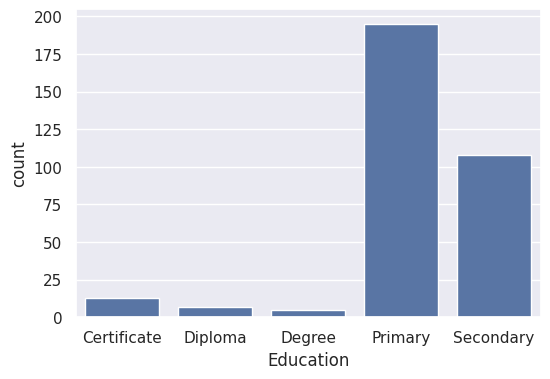

In [ ]:
plt.figure(figsize=(6,4),dpi=100)
sns.countplot(data=data_no_mv,x='Education');

<Axes: xlabel='Education', ylabel='Yield'>

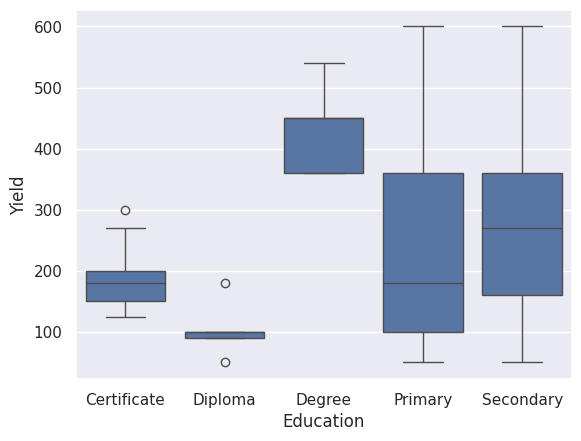

In [ ]:
# Seeing how these education levels stack up againt corn yield using a boxplot:
sns.boxplot(x="Education", y="Yield", data=data_no_mv)

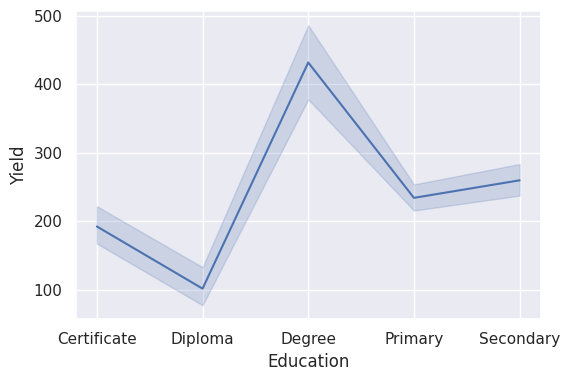

In [ ]:
# To visualize Education levels against Corn Yield using a lineplot:
plt.figure(figsize=(6,4),dpi=100)
sns.lineplot(data=data_no_mv,x='Education',y='Yield');
#This shows that on average, farmers with university degrees harvest more corn per acre but
#Mean/Average is the most unstable measure of central tendency.Can be impacted heavily by outliers
#Besides, there are only 5 farmers with university degrees in our dataset.

In [ ]:
#Age bracket
data_no_mv['Age bracket'].unique()

array(['36-45', '46-55', '56-65', '18-35', 'above 65'], dtype=object)

In [ ]:
data_no_mv['Age bracket'].value_counts()

36-45       104
46-55        81
18-35        76
56-65        51
above 65     16
Name: Age bracket, dtype: int64

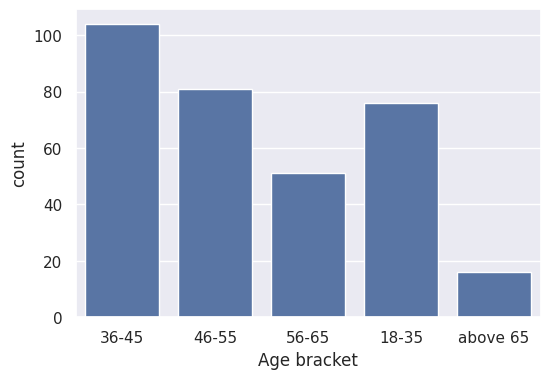

In [ ]:
plt.figure(figsize=(6,4),dpi=100)
sns.countplot(data=data_no_mv,x='Age bracket');

<Axes: xlabel='Age bracket', ylabel='Yield'>

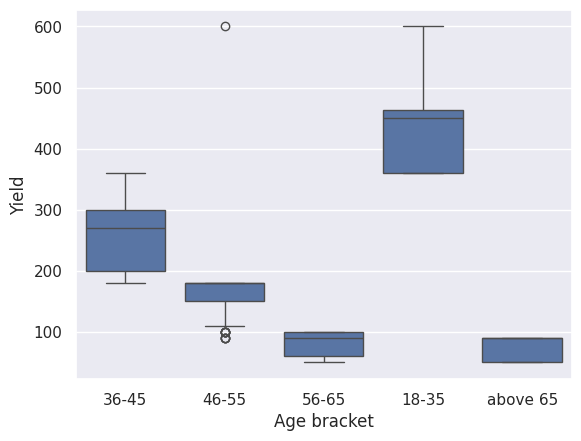

In [ ]:
 # To see how the different age brackets stack up againt corn yield using a boxplot:
sns.boxplot(x="Age bracket", y="Yield", data=data_no_mv)


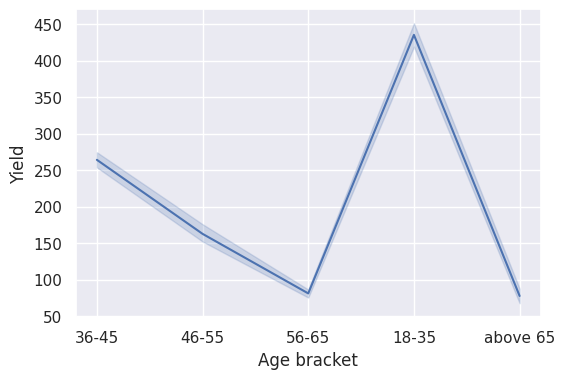

In [ ]:
# To visualize Age bracket against Yield in a lineplot:
plt.figure(figsize=(6,4),dpi=100)
sns.lineplot(data=data_no_mv,x='Age bracket',y='Yield');
# This shows that much of the corn farming is done by people between the 18 and 45 years

In [ ]:
# Main credit source
data_no_mv['Main credit source'].unique()

array(['Credit groups', 'Savings', 'Family'], dtype=object)

In [ ]:
data_no_mv['Main credit source'].value_counts()

Credit groups    248
Family            60
Savings           20
Name: Main credit source, dtype: int64

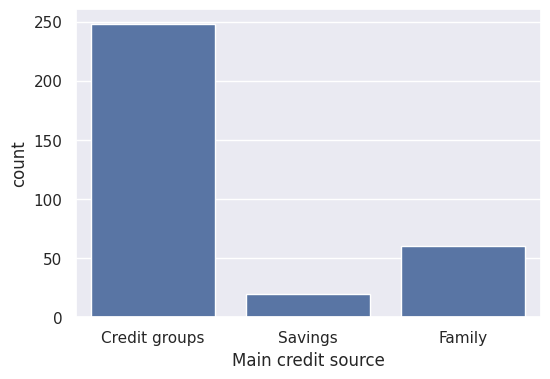

In [ ]:
# We can plot the count:
plt.figure(figsize=(6,4),dpi=100)
sns.countplot(data=data_no_mv,x='Main credit source');

<Axes: xlabel='Main credit source', ylabel='Yield'>

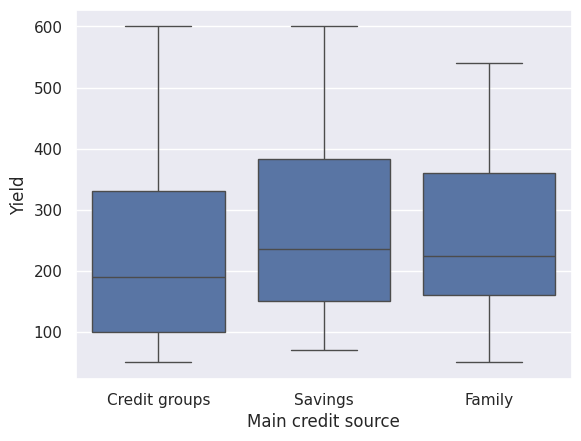

In [ ]:
 # We can also see how the credit sources stack up againt corn yield using a boxplot:
sns.boxplot(x="Main credit source", y="Yield", data=data_no_mv)

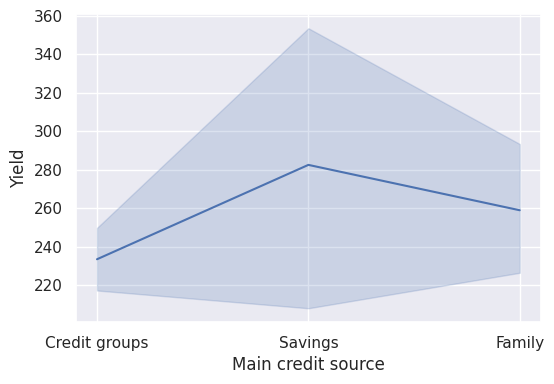

In [ ]:
plt.figure(figsize=(6,4),dpi=100)
sns.lineplot(data=data_no_mv,x='Main credit source',y='Yield');

## Probability Distribution Functions (PDFs) and Correlation

Probability distribution function (PDF) of a variable provides exploratory insights into the dataset. Shows distribution of the variable and allows us to flag spot anomalies like outliers. The PDF is often the basis on which we decide whether we want to transform a feature. Correlation coefficients on the other hand are used to measure how strong a relationship is between two variables. The formulas return a value between -1 and 1, where:
  1 indicates a strong positive relationship.
 -1 indicates a strong negative relationship.
  A result of zero indicates no relationship at all.

### Determining the variables of interest

1. Acreage (Area under corn in acres)

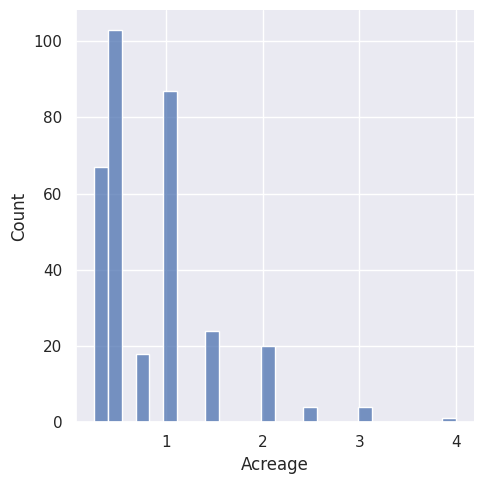

In [ ]:
# Acreage PDF
sns.displot(data_no_mv['Acreage'])
# The variable acreage seems to have outliers (to the right of the graph), we will retain all values for now.
# Since we are working with small-scale farmers, we espect most farms to be between 0.125 to 2.000 acres, we're good.

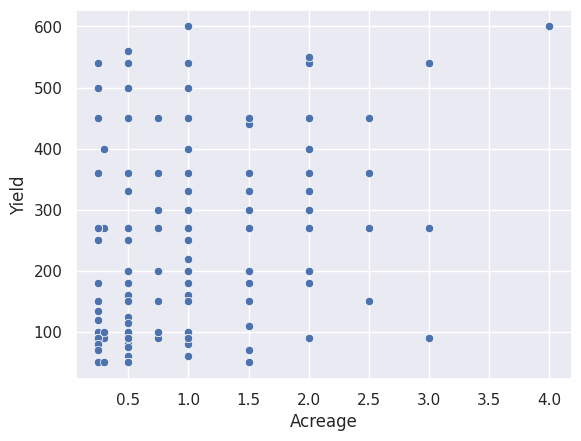

In [ ]:
# To see how acreage stacks up against yield:
sns.scatterplot(data=data_no_mv,x='Acreage',y='Yield'); # This gives you a simple scatter plot

(0.0, 643.852735885375)

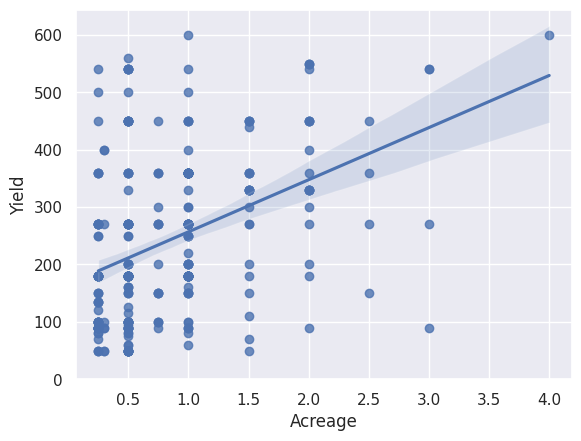

In [ ]:
# To visualize correlation between the 2 features:
sns.regplot(x="Acreage", y="Yield", data=data_no_mv)
plt.ylim(0,)

In [ ]:
# Correlation coefficient:
data_no_mv[["Acreage", "Yield"]].corr()
# While the line depicts a positive correlation (0.39), we can see big variation in the distribution of points

,Acreage,Yield
Acreage,1.000,0.391
Yield,0.391,1.000


 2. Fertilizer amount (Amount of fertilizer used in Kilograms per acre)

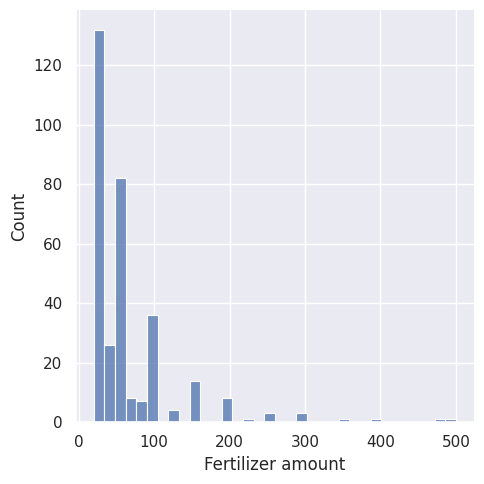

In [ ]:
# Another PDF for fertilizer amount, another variable of interest
sns.displot(data_no_mv['Fertilizer amount'])
# The variable fertilizer amount also seems to have outliers (to the right of the graph)

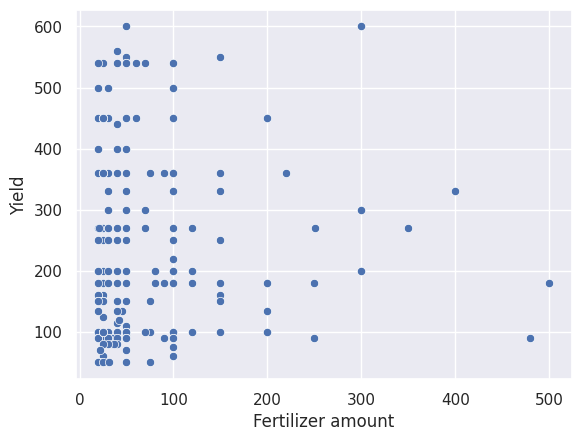

In [ ]:
sns.scatterplot(data=data_no_mv,x='Fertilizer amount',y='Yield'); # This gives you a simple scatter plot

(0.0, 627.5)

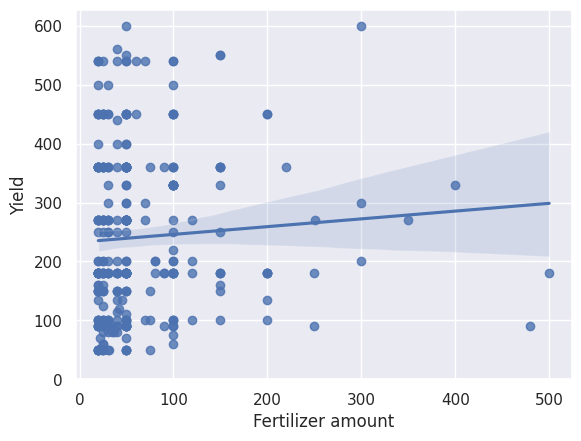

In [ ]:
# To visualize the correlation between the 2 features:
sns.regplot(x="Fertilizer amount", y="Yield", data=data_no_mv)
plt.ylim(0,)

In [ ]:
# Correlation coefficient:
data_no_mv[["Fertilizer amount", "Yield"]].corr()
# This depicts a very weak correlation (0.06)

,Fertilizer amount,Yield
Fertilizer amount,1.000,0.063
Yield,0.063,1.000


 3. Laborers (Average number of workers tending the farm during a season of corn production )

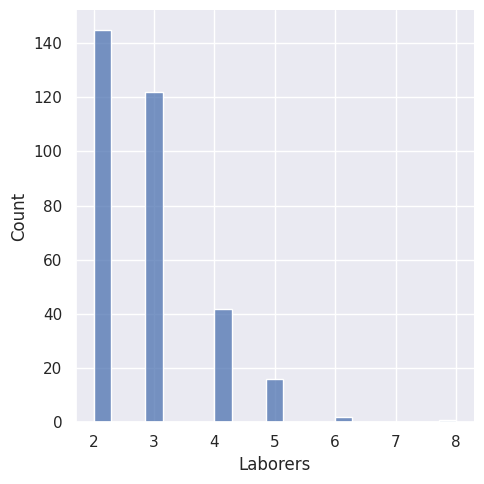

In [ ]:
# Another PDF for Laborers, another variable of interest
sns.displot(data_no_mv['Laborers'])
# We can see that most farms have 2 to 3 laborers on average working on corn farms each season.

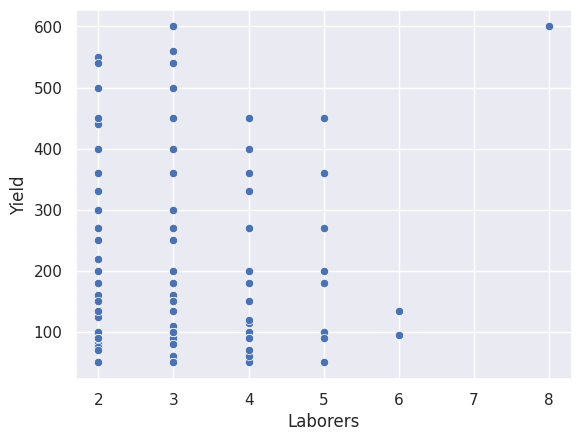

In [ ]:
# To see how laborers stacks up against yield:
sns.scatterplot(data=data_no_mv,x='Laborers',y='Yield');

(0.0, 627.5)

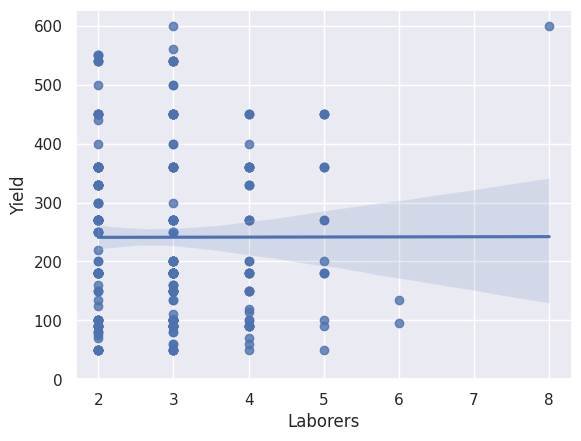

In [ ]:
# To visualize nature of correlation:
sns.regplot(x="Laborers", y="Yield", data=data_no_mv)
plt.ylim(0,)

In [ ]:
# Correlation coefficient:
data_no_mv[["Laborers", "Yield"]].corr()
# This depicts no correlation between Laborers and Yield

,Laborers,Yield
Laborers,1.000,0.001
Yield,0.001,1.000


### Yield
In a couple of codes below, we designate corn yield as our target variable and try to use 3 numerical and 1 categorical variables to try and predict yield (in kgs/acre) of corn. I have to again emphasize that this is an area that even within the defined independet variables/features, there is constant changes that makes it very tricky to gather perfect parameters.

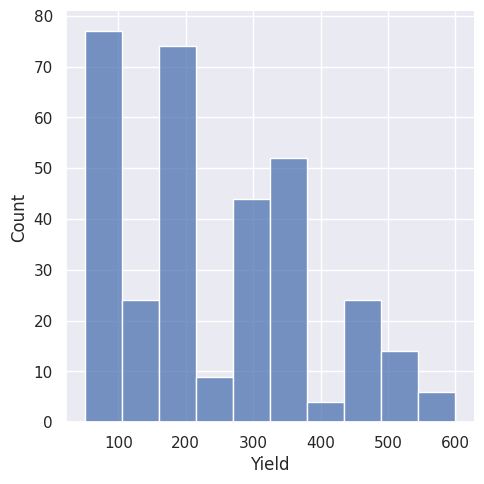

In [ ]:
# Let's see a PDF for corn yield
sns.displot(data_no_mv['Yield'])

As seen from our descriptives above, most farmers sampled get around 232 Kgs/acre of corn on average. The PDF is not close to a normal distribution, but given the multiple dynamic factors that affect crop production,from soil structure and nutrients, climatic conditions, ecological conditions, agronomic practices among others,we would need a combined team of agronomists, climatologists, soil scientists and experienced breeders to identify key parameters within a controlled study environment before we can have a normal distribution.

### Grouping and Aggregation

In [ ]:
# We can group and agreggate some variables to gain more insights into our data:
data_no_mv.groupby('Education').agg({'Acreage': 'sum', 'Yield':'mean'})

,Acreage,Yield
Education,,
Certificate,12.250,192.308
Degree,3.000,432.000
Diploma,3.500,101.429
Primary,154.250,234.128
Secondary,98.150,259.769


In [ ]:
# To group data using a particular variable/column:
data_no_mv.groupby('Farmer')

### Pivot Tables
We can also generate a pivot table to see corn acreage against yield for each farmer:

In [ ]:
data_no_mv.pivot_table(values='Acreage', index='Farmer', columns='Yield')
# See for instance that "fmr_1" for the last 2 corn planting seasons has planted 2 acres and harveted an average 330 kgs/acre

Yield,50,60,70,75,80,90,95,100,110,115,...,330,360,400,440,450,500,540,550,560,600
Farmer,,,,,,,,,,,,,,,,,,,,,
fmr_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fmr_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.500,NaN,NaN,NaN
fmr_102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fmr_104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.750,NaN,NaN,NaN,NaN,NaN
fmr_105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fmr_92,NaN,NaN,NaN,NaN,0.500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fmr_93,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fmr_94,0.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Cross-tabulation
Cross-tabulation is a two-or-more dimensional table that records frequency of respondents with specific characteristics and provides a wealth of information about the relationship between the variables.

In [ ]:
# cross-tabulate Education and Age bracket:
pd.crosstab(data_no_mv['Education'], data_no_mv['Age bracket'])
# We can see that most farmers with primary level of education are aged between 36 to 45 years
# while there are no youthful farmers ( aged 18-35 years) with a Certificate or Diploma education from the sample

Age bracket,18-35,36-45,46-55,56-65,above 65
Education,,,,,
Certificate,0,4,9,0,0
Degree,5,0,0,0,0
Diploma,0,0,3,4,0
Primary,46,60,36,37,16
Secondary,25,40,33,10,0


### Sampling Bias and Data Quality Assessment


In [ ]:
# Reset the index
data_cleaned = data_no_mv.reset_index(drop=True)

In [ ]:
data_cleaned.describe(include='all')

,Farmer,Education,Gender,Age bracket,Acreage,Fertilizer amount,Laborers,Yield,Main credit source,Farm records,Main advisory source,Extension provider,Advisory format,Advisory language,Latitude,Longitude
count,328,328,328,328,328.000,328.000,328.000,328.000,328,328,328,328,328,328,328.000,328.000
unique,328,5,2,5,NaN,NaN,NaN,NaN,3,2,5,4,2,3,NaN,NaN
top,fmr_65,Primary,Female,36-45,NaN,NaN,NaN,NaN,Credit groups,No,Radio,County Government,Phone Calls,Kiswahili,NaN,NaN
freq,1,195,233,104,NaN,NaN,NaN,NaN,248,238,144,189,224,254,NaN,NaN
mean,NaN,NaN,NaN,NaN,0.827,63.555,2.817,241.098,NaN,NaN,NaN,NaN,NaN,NaN,-3.417,38.404
std,NaN,NaN,NaN,NaN,0.591,65.791,0.930,137.121,NaN,NaN,NaN,NaN,NaN,NaN,0.080,0.093
min,NaN,NaN,NaN,NaN,0.250,20.000,2.000,50.000,NaN,NaN,NaN,NaN,NaN,NaN,-3.640,38.270
25%,NaN,NaN,NaN,NaN,0.500,25.000,2.000,135.000,NaN,NaN,NaN,NaN,NaN,NaN,-3.490,38.348
50%,NaN,NaN,NaN,NaN,0.500,50.000,3.000,200.000,NaN,NaN,NaN,NaN,NaN,NaN,-3.400,38.370
75%,NaN,NaN,NaN,NaN,1.000,75.000,3.000,360.000,NaN,NaN,NaN,NaN,NaN,NaN,-3.360,38.402


## OLS assumptions and Corn Yield Estimation

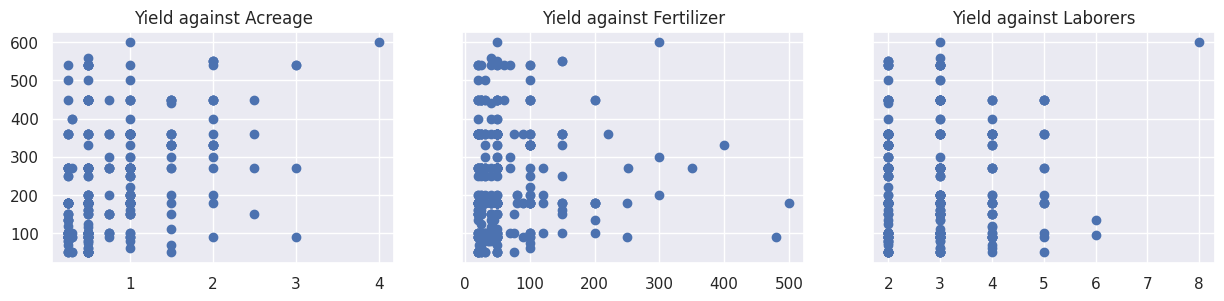

In [ ]:
# Here, let's use some matplotlib code:

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'yield' as y
ax1.scatter(data_cleaned['Acreage'],data_cleaned['Yield'])
ax1.set_title('Yield against Acreage')
ax2.scatter(data_cleaned['Fertilizer amount'],data_cleaned['Yield'])
ax2.set_title('Yield against Fertilizer')
ax3.scatter(data_cleaned['Laborers'],data_cleaned['Yield'])
ax3.set_title('Yield against Laborers')

plt.show()

### Multicollinearity
One of the 4 main assumptions that must be dealt with in a multiple regression model is multicollinearity, a statistical term which describes correlation between multiple independent variables in a model. Two independet variables are considered perfectly collinear when they have a correlation coefficient of either +1.0 or -1.0 (positive or negative). The presence of multicollinearity among independent variables can lead to less dependable statistical conclusions.

When multicollinearity is present, the estimated regression coefficients may become large and unpredictable, leading to unreliable inferences about the effects of the predictor variables on the response variable. In our example, assuming that the larger the farm, the more the amount of fertilizer a farmer uses per acre, it becomes difficult to determine which of these two variables have a bigger impact on corn yield if we used both in our regression model.

In [ ]:
# The columns of our data frame
data_cleaned.columns.values

array(['Farmer', 'Education', 'Gender', 'Age bracket', 'Acreage',
       'Fertilizer amount', 'Laborers', 'Yield', 'Main credit source',
       'Farm records', 'Main advisory source', 'Extension provider',
       'Advisory format', 'Advisory language', 'Latitude', 'Longitude'],
      dtype=object)

In [ ]:
#dropping some columns so that we retain only our variables of interest
data_main_variables = data_cleaned.drop(['Latitude','Longitude','Gender','Advisory language', 'Age bracket','Farmer','Farm records','Main advisory source','Main credit source','Extension provider','Advisory format',],axis=1)

In [ ]:
data_main_variables.columns.values

array(['Education', 'Acreage', 'Fertilizer amount', 'Laborers', 'Yield'],
      dtype=object)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = data_main_variables[['Acreage','Fertilizer amount','Laborers']]

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Lets include names so it is easier to explore the result
vif["Features"] = variables.columns

In [ ]:
vif

,VIF,Features
0,2.744,Acreage
1,1.955,Fertilizer amount
2,2.784,Laborers


VIF starts at 1 and has no upper limit. VIF of 1 depicts NO correlation between the independent variable and the other variables while VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

## Create dummy variables

In [ ]:
# To include the categorical data in the regression, creating dummies using the 'get_dummies' method.
# It is extremely important that we drop one of the dummies, alternatively we will introduce multicollinearity
data_with_dummies = pd.get_dummies(data_main_variables, drop_first=False)

In [ ]:
data_with_dummies.head()

,Acreage,Fertilizer amount,Laborers,Yield,Education_Certificate,Education_Degree,Education_Diploma,Education_Primary,Education_Secondary
0,2.000,50,2,300,1,0,0,0,0
1,0.250,50,2,270,1,0,0,0,0
2,3.000,251,2,270,1,0,0,0,0
3,1.500,300,3,200,1,0,0,0,0
4,0.500,200,2,180,1,0,0,0,0


### Let's rearrange our data frame


In [ ]:
data_with_dummies.columns.values

array(['Acreage', 'Fertilizer amount', 'Laborers', 'Yield',
       'Education_Certificate', 'Education_Degree', 'Education_Diploma',
       'Education_Primary', 'Education_Secondary'], dtype=object)

In [ ]:
cols = ['Yield', 'Acreage','Fertilizer amount', 'Laborers','Education_Primary', 'Education_Secondary', 'Education_Certificate',
       'Education_Diploma','Education_Degree']

In [ ]:
# Creating a new df, which is equal to the old one but with the new order of features
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,Yield,Acreage,Fertilizer amount,Laborers,Education_Primary,Education_Secondary,Education_Certificate,Education_Diploma,Education_Degree
0,300,2.000,50,2,0,0,1,0,0
1,270,0.250,50,2,0,0,1,0,0
2,270,3.000,251,2,0,0,1,0,0
3,200,1.500,300,3,0,0,1,0,0
4,180,0.500,200,2,0,0,1,0,0


In [ ]:
data_preprocessed.tail()

,Yield,Acreage,Fertilizer amount,Laborers,Education_Primary,Education_Secondary,Education_Certificate,Education_Diploma,Education_Degree
323,90,1.000,50,2,0,1,0,0,0
324,70,0.250,22,4,0,1,0,0,0
325,50,0.500,31,2,0,1,0,0,0
326,50,0.500,50,3,0,1,0,0,0
327,50,1.500,50,2,0,1,0,0,0


## Linear regression model

### Let's declare the inputs and the target

In [ ]:
# Our target/dependent variable is 'Yield'
targets = data_preprocessed['Yield']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['Yield'],axis=1)

### Scale the data

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler()

In [ ]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

### Lets perform a Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state.
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state = 365)

In [ ]:
x_train.shape, x_test.shape

((262, 8), (66, 8))

In [ ]:
x_train

array([[ 0.2938295 ,  6.64399458, -0.87960146, ..., -0.2031498 ,
        -0.14767144, -0.12441815],
       [-0.97762268, -0.66303496, -0.87960146, ..., -0.2031498 ,
        -0.14767144, -0.12441815],
       [ 0.2938295 ,  0.85926286,  0.1969257 , ...,  4.92247592,
        -0.14767144, -0.12441815],
       ...,
       [ 0.2938295 , -0.58692007, -0.87960146, ..., -0.2031498 ,
        -0.14767144, -0.12441815],
       [-0.55380529, -0.20634561,  3.42650717, ..., -0.2031498 ,
        -0.14767144, -0.12441815],
       [ 1.98909907, -0.20634561,  1.27345286, ..., -0.2031498 ,
        -0.14767144, -0.12441815]])

In [ ]:
y_train.shape, y_test.shape

((262,), (66,))

In [ ]:
y_train

151    180
187     90
8      180
93     270
300    160
      ... 
226    500
261    270
289    180
180     95
82     330
Name: Yield, Length: 262, dtype: int64

### Lets create our regression

In [ ]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
# Let's check the outputs of the regression
y_hat = reg.predict(x_train)

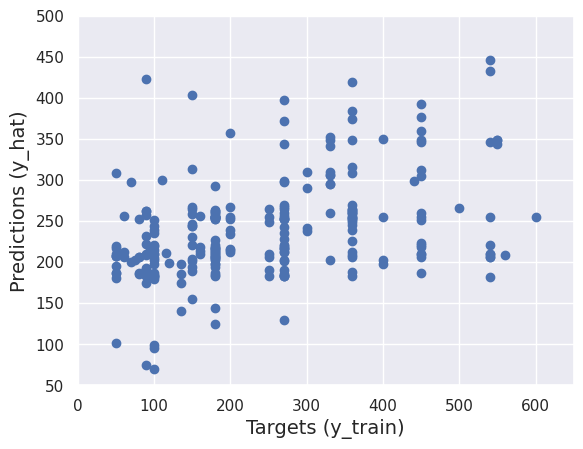

In [ ]:
# Comparing the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot

plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=14)
plt.ylabel('Predictions (y_hat)',size=14)
plt.xlim(0,650)
plt.ylim(50,500)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

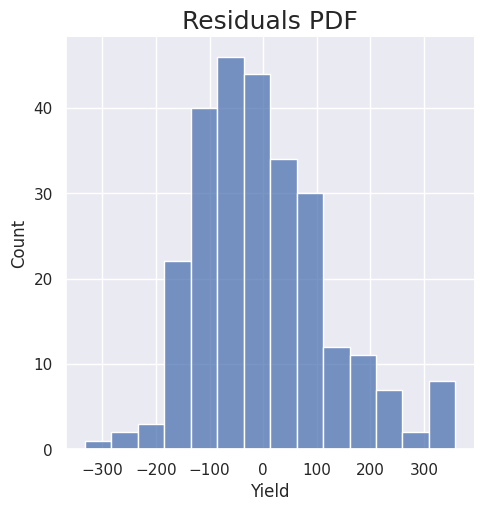

In [ ]:
# Another useful check is a residual plot
sns.displot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

### R-squared
The most common interpretation of r-squared is how well the regression model explains observed data (the goodness of fit).

In [ ]:
reg.score(x_train,y_train)

0.20255582482334178

### Individual Predictors and Statistical Significance:
### P-value
The P-value is the probability value that the correlation between these two variables is statistically significant.

In [ ]:
 from scipy import stats

In [ ]:
pearson_coef, p_value = stats.pearsonr(data_preprocessed['Acreage'], data_preprocessed['Yield'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.39114918996190107  with a P-value of P = 1.9534358107698284e-13


Since p-value 1.9534358107698821e-13 is 1.9534 x 10^-13, the p-value is < 0.001. Consequently, the correlation between Acreage and Yield is statistically significant, although the linear relationship isn’t extremely strong (~0.391).



In [ ]:
pearson_coef, p_value = stats.pearsonr(data_preprocessed['Fertilizer amount'], data_preprocessed['Yield'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.06328924161770162  with a P-value of P = 0.2530438932734942


In [ ]:
pearson_coef, p_value = stats.pearsonr(data_preprocessed['Laborers'], data_preprocessed['Yield'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.0013389427144488938  with a P-value of P = 0.9807276014419555


### Finding the weights and bias

In [ ]:
# Intercept of the regression
reg.intercept_

238.75167553564532

In [ ]:
# Coefficients of the regression
reg.coef_

array([ 54.28381858,  -3.56149157,   2.56090831,  -0.52300582,
         4.6137303 , -10.53889927, -16.22143928,  20.31494359])

In [ ]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Acreage,54.284
1,Fertilizer amount,-3.561
2,Laborers,2.561
3,Education_Primary,-0.523
4,Education_Secondary,4.614
5,Education_Certificate,-10.539
6,Education_Diploma,-16.221
7,Education_Degree,20.315


### Interpretation
1. A numerical feature (Acreage): An increase in farm size by 1 acre increases the predicted corn yield by 54.2 kilograms, when all other features remain fixed.
2. Categorical feature (Education_None): The predicted yield is boosted by 20.3 kilograms for every farmer with a degree, compared to one with a certificate, again assuming that all other features do not change.

### Conclusion
In this case, only about 20% of the variability observed in the target variable (yield), is explained by the regression model. Given the above observations from the (y_train - y_hat) scatter plot, the yield residuals PDF and the r-squared of about 20%.